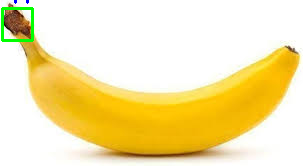

True

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow #

# Load the image
image_path = "/content/bnana.jpeg"  # path to image
image = cv2.imread(image_path)
output = image.copy()

# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to detect objects
_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Predefined labels for demonstration
# Replace with an ML model for better accuracy
labels = ["Banana", "Apple", "Orange", "Other"]

# Loop through each detected contour
for contour in contours:
    # Get bounding box
    x, y, w, h = cv2.boundingRect(contour)

    # Ignore small objects
    if w * h > 500:
        # Extract ROI (Region of Interest)
        roi = image[y:y+h, x:x+w]

        # Dummy condition: classify based on ROI size or color
        # Replace with a model or feature extraction logic
        label = "Other"
        if w > h:
            label = "Banana"
        elif np.mean(roi[:, :, 2]) > 150:  # Check red intensity
            label = "Apple"

        # Draw the bounding box and label
        cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(output, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

 # Display the output using cv2_imshow instead of cv2.imshow
cv2_imshow(output)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the output image
cv2.imwrite("labeled_image.jpg", output)

